<a href="https://colab.research.google.com/github/hyamynl619/hello-world/blob/master/Build_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()

Saving missing-migrants-project.zip to missing-migrants-project.zip


In [0]:
!unzip 'missing-migrants-project.zip'

Archive:  missing-migrants-project.zip
  inflating: MissingMigrants-Global-2019-03-29T18-36-07.csv  


In [0]:
dff = pd.read_csv('MissingMigrants-Global-2019-03-29T18-36-07.csv')

print(dff.shape)
dff.head(150)

(5333, 20)


,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48090,Sub-Saharan Africa,"December 30, 2018",2018,Dec,14.0,NaN,14,12.0,NaN,NaN,NaN,Suffocation,"Inside vehicle on Tanzania-Zambia highway, nea...","Xinhua, African Daily Voice, Mwananchi","-6.840928719012, 37.626193558523",NaN,"https://bit.ly/2VBQyop, https://bit.ly/2FfEPpY...",Eastern Africa,3
146,48087,Mediterranean,"December 28, 2018",2018,Dec,NaN,7.0,7,1.0,NaN,NaN,NaN,Presumed drowning,"15 miles northeast of Cape Greco, Cyprus (boat...","Alarm Phone, Cyprus Mail","34.869024451220, 34.492835772639",Eastern Mediterranean,"https://bit.ly/2GSo2Md, https://bit.ly/2sfX4nz...",Uncategorized,4
147,48088,US-Mexico Border,"December 28, 2018",2018,Dec,1.0,NaN,1,NaN,NaN,1.0,NaN,Drowning,"Off the coast of Imperial Beach, San Diego Cou...","Uniradio Informa, Frontera","32.541882023698, -117.133734140230",Central America to US,"https://bit.ly/2LSLIyE, https://bit.ly/2GZqPmC",Northern America,3
148,48322,US-Mexico Border,"December 27, 2018",2018,Dec,1.0,NaN,1,NaN,NaN,1.0,NaN,Unknown,Ranch east of the Falfurrias US Border Patrol ...,Breitbart News,"27.028916988435, -98.070345308930",NaN,https://bit.ly/2RHI3t5,Northern America,1


In [0]:
df = dff[["Region of Incident","Reported Year", "Reported Month", "Number Dead", "Minimum Estimated Number of Missing", "Total Dead and Missing", "Cause of Death"]]
print(df.shape)
df.head(100)

(5333, 7)


,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Cause of Death
0,Mediterranean,2019,Mar,NaN,2.0,2,Presumed drowning
1,Mediterranean,2019,Mar,4.0,NaN,4,Presumed drowning
2,Mediterranean,2019,Mar,1.0,NaN,1,Presumed drowning
3,Mediterranean,2019,Mar,1.0,NaN,1,Presumed drowning
4,Central America,2019,Mar,1.0,NaN,1,Fall from train
...,...,...,...,...,...,...,...
95,US-Mexico Border,2019,Jan,1.0,NaN,1,Unknown (skeletal remains)
96,US-Mexico Border,2019,Jan,1.0,NaN,1,Presumed drowning
97,Mediterranean,2019,Jan,1.0,NaN,1,Drowning
98,US-Mexico Border,2019,Jan,2.0,NaN,2,Vehicle Accident


In [0]:
just_US = df['Region of Incident']== 'US-Mexico Border'
print(just_US.head())

0    False
1    False
2    False
3    False
4    False
Name: Region of Incident, dtype: bool


In [0]:
US_Mex = df[just_US]

US_Mex.head()

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Cause of Death
5,US-Mexico Border,2019,Mar,1.0,NaN,1,Unknown (skeletal remains)
6,US-Mexico Border,2019,Mar,1.0,NaN,1,Unknown (skeletal remains)
9,US-Mexico Border,2019,Mar,1.0,NaN,1,Unknown (skeletal remains)
10,US-Mexico Border,2019,Mar,1.0,NaN,1,Unknown (skeletal remains)
16,US-Mexico Border,2019,Mar,1.0,NaN,1,Unknown (skeletal remains)


In [0]:
US_Mex.fillna(0)

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Cause of Death
5,US-Mexico Border,2019,Mar,1.0,0.0,1,Unknown (skeletal remains)
6,US-Mexico Border,2019,Mar,1.0,0.0,1,Unknown (skeletal remains)
9,US-Mexico Border,2019,Mar,1.0,0.0,1,Unknown (skeletal remains)
10,US-Mexico Border,2019,Mar,1.0,0.0,1,Unknown (skeletal remains)
16,US-Mexico Border,2019,Mar,1.0,0.0,1,Unknown (skeletal remains)
...,...,...,...,...,...,...,...
5327,US-Mexico Border,2014,Jan,1.0,0.0,1,Shot
5328,US-Mexico Border,2014,Jan,1.0,0.0,1,Shot
5330,US-Mexico Border,2014,Jan,1.0,0.0,1,Unknown (skeletal remains)
5331,US-Mexico Border,2014,Jan,1.0,0.0,1,Unknown (skeletal remains)


In [0]:
d1 = US_Mex.groupby(['Reported Year'], as_index=False).sum()

d1.head(6)

,Reported Year,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing
0,2014,306.0,0.0,306
1,2015,336.0,3.0,339
2,2016,397.0,4.0,401
3,2017,408.0,9.0,417
4,2018,438.0,3.0,441
5,2019,56.0,4.0,60


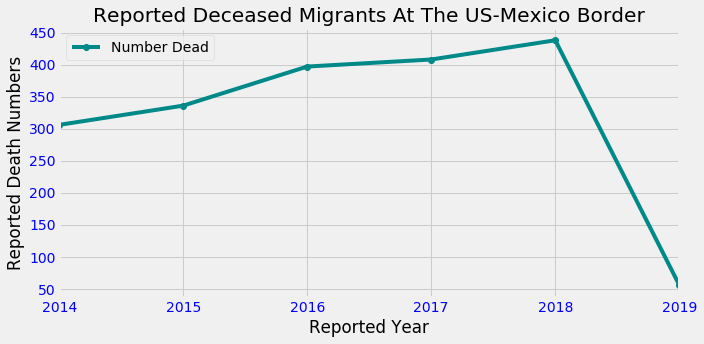

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

style.use('fivethirtyeight')


d1.plot('Reported Year', 'Number Dead', color='#008989', marker= 'o', figsize= (10,5))
plt.ylabel('Reported Death Numbers')
plt.title('Reported Deceased Migrants At The US-Mexico Border')
plt.xticks(color="b")
plt.yticks(color="b")
plt.tight_layout()
plt.show();






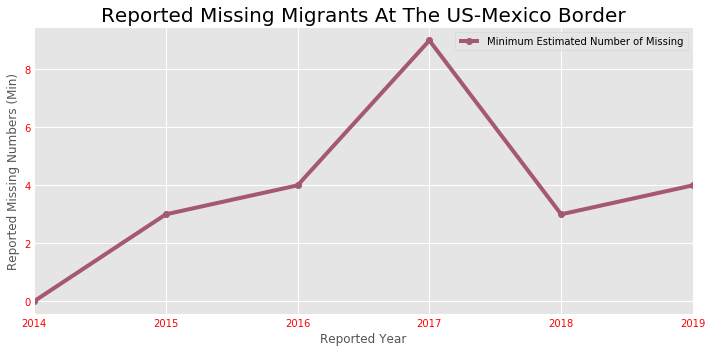

In [0]:
style.use('ggplot')


d1.plot('Reported Year', 'Minimum Estimated Number of Missing', color='#a45872', marker= 'o', figsize= (10,5))
plt.ylabel('Reported Missing Numbers (Min)')
plt.title('Reported Missing Migrants At The US-Mexico Border', fontsize= 20)
plt.xticks(color="r")
plt.yticks(color="r")
plt.tight_layout()
plt.show();



## SOURCES##

https://www.kaggle.com/snocco/missing-migrants-project

https://www.un.org/development/desa/en/news/population/international-migrant-stock-2019.html

https://missingmigrants.iom.int/methodology

